## 1.Data pre-processing 

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
data = pd.read_csv('vehicle-1.csv')
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [16]:
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [17]:
data['class'].astype('category')
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [18]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [30]:
Clean = data.fillna(data.mean())
Clean.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## 2.Understanding the attributes -Find the relationship between different attributes and choose carefully which attributes have to be a part of the analysis and why.

<AxesSubplot:>

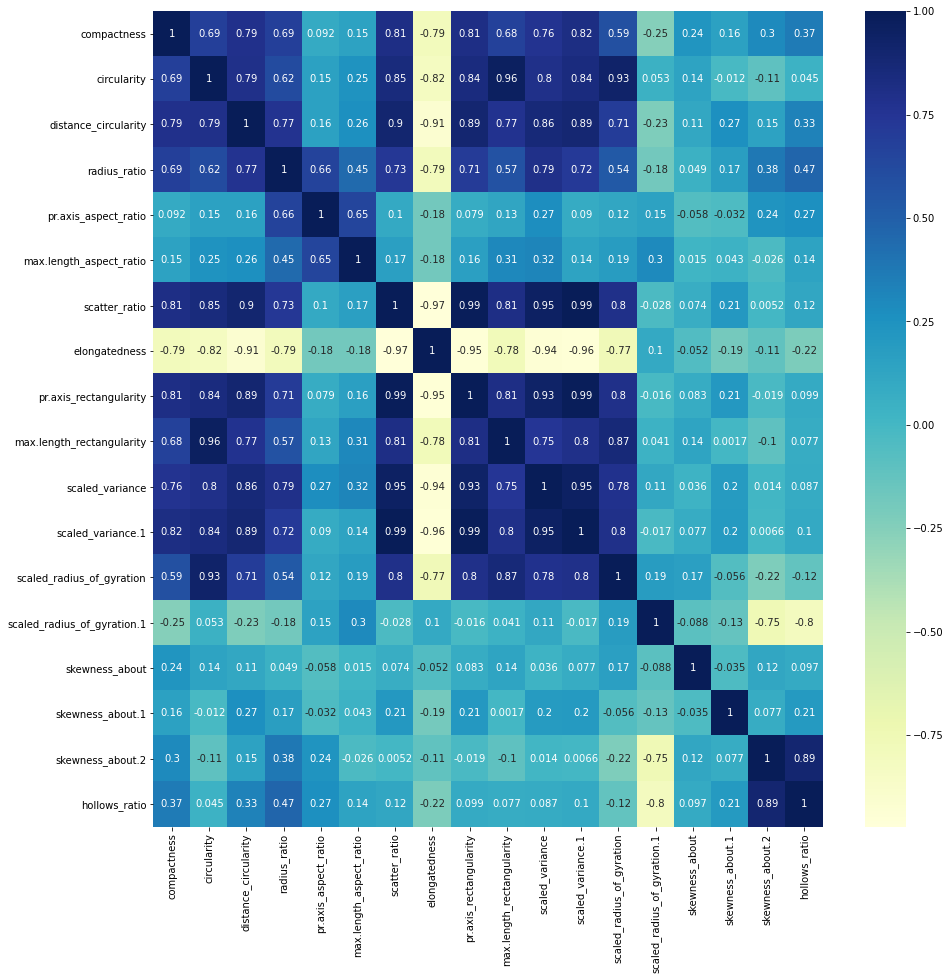

In [36]:
Attributes = Clean.iloc[:,:-1]
correlation = Attributes.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation, annot = True, cmap="YlGnBu")

### It seems, elongatedness has high correlation with the majority of the features.Other variables that have very high correlation and aren't essential for this analysis
### are scatter_ratio, scaled_variance and scaled_variance1.We will drop these features.

In [38]:
data = Attributes.drop(columns = ['elongatedness','scatter_ratio','scaled_variance','scaled_variance.1'], axis = 1)
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
dtype: object

# 3.Split the data into train and test

In [44]:
from sklearn.model_selection import train_test_split

X = data
y = Clean.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

## 4.Train a support vector machine using the train set and get the accuracy on the test set.

In [47]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6929133858267716

## 5.Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data.

### I scaled the data by subtracting the mean from each element on each column.Then i divided each instance by the column's standard deviation.

In [49]:
from sklearn.decomposition import PCA


for i in range(len(X.columns)):
    for j in range(len(X.iloc[:,i])):
        X.iloc[:,i] = X.iloc[:,i] - X.iloc[:,i].mean()
        X.iloc[:,i] =  ((X.iloc[:,i])/(X.iloc[:,i].std()))
X 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,pr.axis_rectangularity,max.length_rectangularity,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160485,0.516996,0.056512,0.272804,1.309431,0.311358,-0.225027,0.757884,0.285449,-0.327744,-0.074296,0.380440,-0.312008,0.183849
1,-0.325277,-0.624195,0.120041,-0.834948,-0.593611,0.094024,-0.611377,-0.344374,-0.513415,-0.059951,0.537556,0.156496,0.013080,0.452709
2,1.253451,0.843051,1.517673,1.200920,0.548214,0.311358,0.934023,0.688993,1.391568,0.073945,1.557308,-0.403365,-0.149464,0.049418
3,-0.082396,-0.624195,-0.007017,-0.296042,0.167606,0.094024,-0.611377,-0.344374,-1.465906,-1.265021,-0.074296,-0.291393,1.638524,1.528152
4,-1.053921,-0.135113,-0.769362,1.081163,5.242384,9.439378,-0.611377,-0.275483,0.408351,7.304361,0.537556,-0.179420,-1.449819,-1.698176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.082396,-0.950249,0.310627,0.422500,0.294475,-0.123310,-0.225027,-0.964395,-0.789945,-0.059951,0.129654,1.388190,-0.149464,-0.085012
842,-0.568159,0.190942,0.120041,-0.176285,0.548214,0.528691,-0.225027,0.757884,0.039645,-0.059951,-1.094049,0.828329,-0.474553,0.183849
843,1.496333,1.495160,1.200030,1.590130,0.675084,0.746025,1.706723,1.722360,0.777057,-0.327744,-0.686148,-0.963226,-0.312008,0.721570
844,-0.932481,-1.439331,-0.261132,-0.685252,-0.466741,-0.340644,-0.997727,-1.653306,-0.820670,-0.863331,-1.298000,1.388190,0.175625,-0.085012


### we vary the number of components till variance >= 95%

In [56]:

for i in range(4,10):
    pca = PCA(n_components=i) # i chose to reduce the features to 10
    pca.fit(X)
    print('Value of variance when using {} components is: {}'.format(i,pca.explained_variance_ratio_.sum()))


Value of variance when using 4 components is: 0.8395506861997946
Value of variance when using 5 components is: 0.9044171801720762
Value of variance when using 6 components is: 0.9366170594278251
Value of variance when using 7 components is: 0.9608589912120713
Value of variance when using 8 components is: 0.975485950776845
Value of variance when using 9 components is: 0.9839488675002083


### looks like we can use 7 principal components for this analysis

In [51]:
pca = PCA(n_components = 7)
pca.fit(X)
scores = pca.transform(X)
scores = pd.DataFrame(scores, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.915284,-0.039931,0.864309,0.081095,0.009849,0.144524,-0.784437
1,1.075807,-0.459546,-0.377147,-0.128489,0.684093,0.659236,0.194907
2,-3.034791,0.396042,-0.093763,-1.099529,0.820087,-0.609182,0.120408
3,0.829549,-2.823910,0.161046,-0.395888,-0.354388,0.588943,0.330720
4,-0.913514,5.087036,11.330125,-0.519505,3.429559,1.567107,2.099342
...,...,...,...,...,...,...,...
841,0.721619,-0.729696,0.345793,1.273020,1.042581,-0.702769,0.110388
842,-0.183408,0.259220,0.753838,1.148977,-0.393650,0.880452,-0.723615
843,-3.821860,0.233747,0.431550,-0.274372,-1.354691,0.212694,0.576543
844,2.538066,-1.194413,-0.148549,1.916843,-0.115058,0.104304,-0.188035


In [52]:
FinalData = pd.concat([scores,y], axis = 1)
FinalData

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,class
0,-0.915284,-0.039931,0.864309,0.081095,0.009849,0.144524,-0.784437,van
1,1.075807,-0.459546,-0.377147,-0.128489,0.684093,0.659236,0.194907,van
2,-3.034791,0.396042,-0.093763,-1.099529,0.820087,-0.609182,0.120408,car
3,0.829549,-2.823910,0.161046,-0.395888,-0.354388,0.588943,0.330720,van
4,-0.913514,5.087036,11.330125,-0.519505,3.429559,1.567107,2.099342,bus
...,...,...,...,...,...,...,...,...
841,0.721619,-0.729696,0.345793,1.273020,1.042581,-0.702769,0.110388,car
842,-0.183408,0.259220,0.753838,1.148977,-0.393650,0.880452,-0.723615,van
843,-3.821860,0.233747,0.431550,-0.274372,-1.354691,0.212694,0.576543,car
844,2.538066,-1.194413,-0.148549,1.916843,-0.115058,0.104304,-0.188035,car


## 6.Calculate the accuracy of the SVM model using Principal Components

In [53]:
X2 = FinalData.drop('class', axis = 1)
y2 = FinalData['class']

X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size = 0.3,random_state = 1)

In [54]:
model2 = svm.SVC()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.8740157480314961

# 7.Conclusions and Observations

### SVM accuracy before PCA: 69.29%
### SVM accuracy after  PCA: 87.4%

### We can clearly see the impact that the Principal Characteristic Analysis has had on our model's accuracy, giving it an amazing increase of almost 20%.